In [112]:
import pandas_profiling
import pandas as pd
import numpy as np
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [160]:
#Loading master and test files

df = pd.read_csv('pizza.csv')


In [161]:
df.profile_report()

In [162]:
df.shape

(300, 9)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
brand     300 non-null object
id        300 non-null int64
mois      300 non-null float64
prot      300 non-null float64
fat       300 non-null float64
ash       300 non-null float64
sodium    300 non-null float64
carb      300 non-null float64
cal       300 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [164]:
df.head()


,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [165]:
df.isna().sum()

brand     0
id        0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

In [166]:
le = preprocessing.LabelEncoder()
#label encoding - converting object to 0/1
df1 = df.apply(le.fit_transform)

In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
brand     300 non-null int32
id        300 non-null int64
mois      300 non-null int64
prot      300 non-null int64
fat       300 non-null int64
ash       300 non-null int64
sodium    300 non-null int64
carb      300 non-null int64
cal       300 non-null int64
dtypes: int32(1), int64(8)
memory usage: 20.0 KB


### Question 1

In [168]:
mms = MinMaxScaler()
mms.fit(df1)
data_transformed = mms.transform(df1)

In [169]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

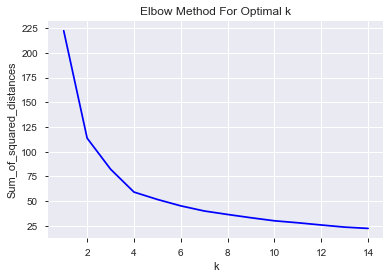

In [170]:
#We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). 
#And select the value of K for the elbow point as shown in the plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Performing K-means with optimal K obtained from above  

In [171]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data_transformed)

In [172]:
print(km.cluster_centers_)

[[0.94717668 0.58281515 0.74746866 0.42867832 0.260971   0.34596162
  0.26980051 0.49103112 0.16265551]
 [0.61759259 0.48637931 0.26280637 0.1631397  0.32929487 0.09898374
  0.13493976 0.79308575 0.58368794]
 [0.16900093 0.46502463 0.60621602 0.7700408  0.76357466 0.72519984
  0.5534069  0.18810133 0.48971929]]


In [173]:
print(km.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


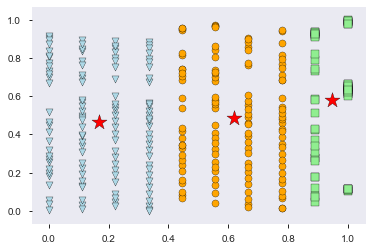

In [174]:
# plot the 3 clusters
plt.scatter(
    data_transformed[y_km == 0, 0], data_transformed[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
   data_transformed[y_km == 1, 0], data_transformed[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
  data_transformed[y_km == 2, 0], data_transformed[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.grid()
plt.show()

### Question 2

In [134]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [135]:
# loading dataset into Pandas DataFrame
df = pd.read_csv('pizza.csv')

In [136]:
# split data table into data X and class labels y
X = df.ix[:,2:9].values
y = df.ix[:,0].values

In [137]:
X_std = StandardScaler().fit_transform(X)

In [138]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_std )

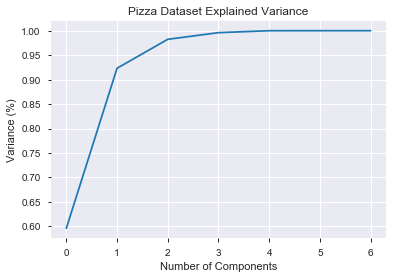

In [139]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pizza Dataset Explained Variance')
plt.show()

In [140]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


principalDf.head()

,principal component 1,principal component 2
0,5.010343,2.679215
1,5.023755,2.529295
2,4.805439,2.673700
3,4.469543,2.285029
4,4.471893,2.159152


In [141]:
finalDf = pd.concat([principalDf, df[['brand']]], axis = 1)

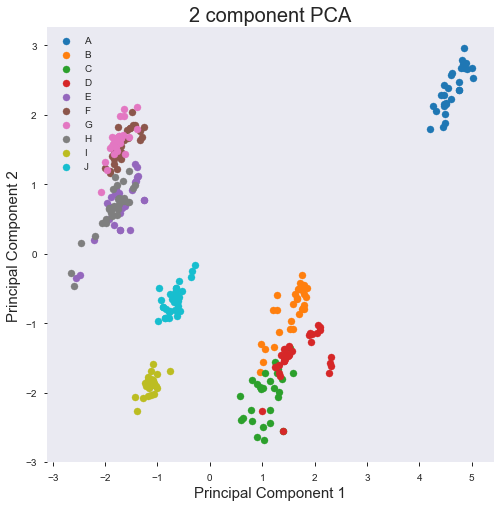

In [142]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(label_dict.values())

for target in targets:
    indicesToKeep = finalDf['brand'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

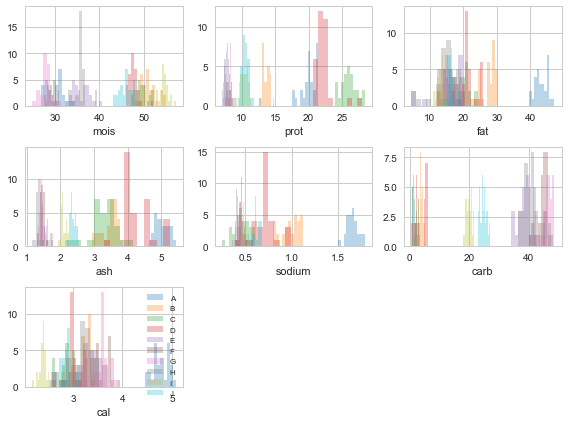

In [143]:
label_dict = {1: 'A',
              2: 'B',
              3: 'C', 4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J'}

feature_dict = {0: 'mois',
                1: 'prot',
                2: 'fat',
                3: 'ash',
               4:'sodium',
               5:'carb',
               6:'cal'}
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(7):
        plt.subplot(3, 3, cnt+1)
        for lab in label_dict.values():
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [144]:
pca.explained_variance_ratio_

array([0.59596884, 0.3272082 ])

In [145]:
print(abs( pca.components_ ))

[[0.06470937 0.3787609  0.44666592 0.47188953 0.43570289 0.42491371
  0.2444873 ]
 [0.62827587 0.26970665 0.23437908 0.11099042 0.20166165 0.32031208
  0.56745756]]


In [146]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(label_dict.values())
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

print(dic)

{'PC0': 'D', 'PC1': 'A'}


In [149]:
finalDf.head()

,principal component 1,principal component 2,brand
0,5.010343,2.679215,A
1,5.023755,2.529295,A
2,4.805439,2.673700,A
3,4.469543,2.285029,A
4,4.471893,2.159152,A


### Question 3

In [150]:
le = preprocessing.LabelEncoder()
#label encoding - converting object to 0/1
PCA_cl= finalDf.apply(le.fit_transform)

In [151]:
PCA_cl.head()

,principal component 1,principal component 2,brand
0,292,288,0
1,293,283,0
2,285,287,0
3,272,276,0
4,273,272,0


In [152]:
mms = MinMaxScaler()
mms.fit(PCA_cl)
data_transformed = mms.transform(PCA_cl)

In [153]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

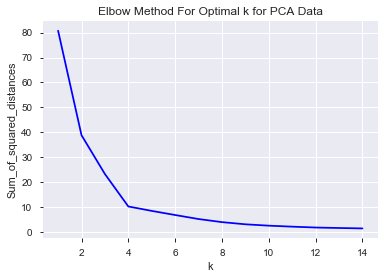

In [154]:
#We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). 
#And select the value of K for the elbow point as shown in the plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k for PCA Data')
plt.show()

In [155]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data_transformed)

In [156]:
print(km.cluster_centers_)

[[ 4.97118559e-01  2.66938958e-01  9.47176685e-01]
 [ 7.50701555e-01  2.40197194e-01  2.23456790e-01]
 [ 2.00085324e-01  7.00369738e-01  6.17592593e-01]
 [ 9.52218430e-01  9.48805461e-01 -3.33066907e-16]]


In [157]:
print(km.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


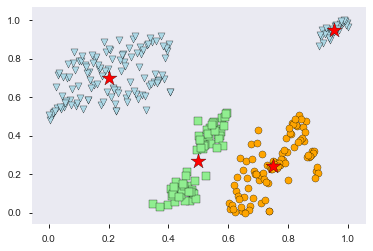

In [158]:
# plot the 3 clusters
plt.scatter(
    data_transformed[y_km == 0, 0], data_transformed[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
   data_transformed[y_km == 1, 0], data_transformed[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
  data_transformed[y_km == 2, 0], data_transformed[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
  data_transformed[y_km == 3, 0], data_transformed[y_km == 3, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.grid()
plt.show()